<a href="https://colab.research.google.com/github/markoutsikou/DWS101-ML/blob/main/MLProject_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Library**



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.decomposition import TruncatedSVD
from sklearn.svm import SVC

# **Question 1**

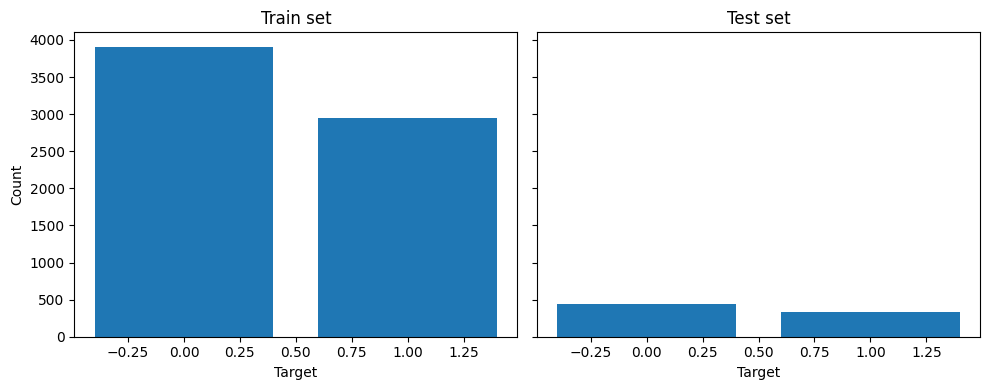

In [ ]:
df = pd.read_csv('train.csv')
x = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.1,
    stratify=y,
    random_state=0
)

train_counts = y_train.value_counts().sort_index()
test_counts = y_test.value_counts().sort_index()

fig, axes = plt.subplots(1, 2, figsize=(10,4), sharey=True)

axes[0].bar(train_counts.index, train_counts.values)
axes[0].set_title("Train set")
axes[0].set_xlabel("Target")
axes[0].set_ylabel("Count")

axes[1].bar(test_counts.index, test_counts.values)
axes[1].set_title("Test set")
axes[1].set_xlabel("Target")

plt.tight_layout()
plt.show()

The dataset is not completely balanced because we have more samples of no catastrofy.

# **Question 2**

In [ ]:
X_train = X_train.drop(columns=["id", "location"])
X_test  = X_test.drop(columns=["id", "location"])
X_train = X_train.fillna("null")
X_test  = X_test.fillna("null")
X_train["inputs"] = X_train["keyword"] + " " + X_train["text"]
X_test["inputs"]  = X_test["keyword"] + " " + X_test["text"]
X_train = X_train[["inputs"]]
X_test  = X_test[["inputs"]]

# **Question 3**

In [ ]:
#Remove unicodes because they increase the noise and can't be used
def removeUnicode(text):
  """ Removes unicode strings like "\u002c" and "x96" """
  text = re.sub(r'(\\u[0-9A-Fa-f]+)',r'', text)
  text = re.sub(r'[^\x00-\x7f]',r'',text)
  return text

#Remove URLs because they don't offer semantic information
def replaceURL(text):
    """ Replaces url address with "url" """
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','url',text)
    text = re.sub(r'#([^\s]+)', r'\1', text)
    return text

#Remove mentions because they are noise and are not related to incidents
def replaceAtUser(text):
  """ Replaces "@user" with "atUser" """
  text = re.sub('@[^\s]+','atUser',text)
  return text

#Remove the hashtag symbol and keep the text because the text usually refers to incident
def removeHashtagInFrontOfWord(text):
  """ Removes hastag in front of a word """
  text = re.sub(r'#([^\s]+)', r'\1', text)
  return text

#Remove punctuation symbols because they don't offer semantic information
def replaceMultiExclamationMark(text):
  """ Replaces repetitions of exlamation marks """
  text = re.sub(r"(\\!)\\1+", ' multiExclamation ', text)
  return text

def replaceMultiQuestionMark(text):
  """ Replaces repetitions of question marks """
  text = re.sub(r"(\\?)\\1+", ' multiQuestion ', text)
  return text

def replaceMultiStopMark(text):
  """ Replaces repetitions of stop marks """
  text = re.sub(r"(\\.)\\1+", ' multiStop ', text)
  return text

#Remove emoticons beacause they are noise
def removeEmoticons(text):
  """ Removes emoticons from text """
  text = re.sub(':\)|;\)|:-\)|\[-:\)|:-D|=D|:P|xD|X-p|\^\^|:-*|\^\.\^|\^\-\|^\_\^|,-\)|\)-:|:\'\(|:\(|:-\(|:\S|T\.T|\.\_\.|:<|:-\S|:-<|\*\-\*:O|=O|=\-O|O\.o|XO|O\_O|:-\@|=/|:/|X-\(|>\.<|>=\(|D:', '', text)
  return text

def cleaning(text):
  text = removeUnicode(text)
  text = replaceURL(text)
  text = replaceAtUser(text)
  text = removeHashtagInFrontOfWord(text)
  text = replaceMultiExclamationMark(text)
  text = replaceMultiQuestionMark(text)
  text = replaceMultiStopMark(text)
  text = removeEmoticons(text)
  return text

X_train["inputs"] = X_train["inputs"].apply(cleaning)
X_test["inputs"]  = X_test["inputs"].apply(cleaning)


<>:11: SyntaxWarning: invalid escape sequence '\.'
<>:18: SyntaxWarning: invalid escape sequence '\s'
<>:46: SyntaxWarning: invalid escape sequence '\)'
<>:11: SyntaxWarning: invalid escape sequence '\.'
<>:18: SyntaxWarning: invalid escape sequence '\s'
<>:46: SyntaxWarning: invalid escape sequence '\)'
/tmp/ipython-input-1442063895.py:11: SyntaxWarning: invalid escape sequence '\.'
  text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','url',text)
/tmp/ipython-input-1442063895.py:18: SyntaxWarning: invalid escape sequence '\s'
  text = re.sub('@[^\s]+','atUser',text)
/tmp/ipython-input-1442063895.py:46: SyntaxWarning: invalid escape sequence '\)'
  text = re.sub(':\)|;\)|:-\)|\[-:\)|:-D|=D|:P|xD|X-p|\^\^|:-*|\^\.\^|\^\-\|^\_\^|,-\)|\)-:|:\'\(|:\(|:-\(|:\S|T\.T|\.\_\.|:<|:-\S|:-<|\*\-\*:O|=O|=\-O|O\.o|XO|O\_O|:-\@|=/|:/|X-\(|>\.<|>=\(|D:', '', text)


# **Question 4**

In [ ]:
X_train_inputs = X_train["inputs"].values
X_test_inputs  = X_test["inputs"].values

y_train_targets = y_train.values
y_test_targets  = y_test.values

# **Question 5**

In [ ]:
tfidf = TfidfVectorizer(
    ngram_range=(1, 1),
    min_df=2,
    max_df=0.95,
    stop_words="english"
)

X_train_tfidf = tfidf.fit_transform(X_train_inputs)
X_test_tfidf = tfidf.transform(X_test_inputs)

print(type(X_train_tfidf))
print(X_train_tfidf.shape)
print(X_test_tfidf.shape)

<class 'scipy.sparse._csr.csr_matrix'>
(6851, 5728)
(762, 5728)


# **Question 6**

In [ ]:
svm = LinearSVC(
    C=1.0,
    random_state=0
)

svm.fit(X_train_tfidf, y_train_targets)

y_train_pred = svm.predict(X_train_tfidf)
y_test_pred  = svm.predict(X_test_tfidf)

def print_metrics(y_true, y_pred, split_name):
    print(f"{split_name}")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall   :", recall_score(y_true, y_pred))
    print("F1-score :", f1_score(y_true, y_pred))
    print("-" * 30)

print_metrics(y_train_targets, y_train_pred, "TRAIN")
print_metrics(y_test_targets, y_test_pred, "TEST")

TRAIN
Accuracy : 0.9347540505035761
Precision: 0.9541651509639869
Recall   : 0.8909646739130435
F1-score : 0.9214825223959249
------------------------------
TEST
Accuracy : 0.8018372703412073
Precision: 0.7875816993464052
Recall   : 0.7370030581039755
F1-score : 0.7614533965244866
------------------------------


Recall for target = 1 is the most important metric, because missing a disaster can have real bad consequences, whereas a false alarm is less critical.

# **Question 7**

In [ ]:
svd_temp = TruncatedSVD(n_components=300, random_state=0)
svd_temp.fit(X_train_tfidf)

explained_variance = svd_temp.explained_variance_ratio_.cumsum()

n_components_95 = (explained_variance >= 0.95).argmax() + 1
n_components_95

svd = TruncatedSVD(
    n_components=n_components_95,
    random_state=0
)

X_train_pca = svd.fit_transform(X_train_tfidf)
X_test_pca  = svd.transform(X_test_tfidf)

linear_svc_pca = LinearSVC(random_state=0)
linear_svc_pca.fit(X_train_pca, y_train_targets)
y_test_pred_linear = linear_svc_pca.predict(X_test_pca)

rbf_svc = SVC(
    kernel="rbf",
    C=1.0,
    gamma="scale",
    random_state=0
)

rbf_svc.fit(X_train_pca, y_train_targets)
y_test_pred_rbf = rbf_svc.predict(X_test_pca)

def metrics(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1": f1_score(y_true, y_pred)
    }

linear_results = metrics(y_test_targets, y_test_pred_linear)
rbf_results    = metrics(y_test_targets, y_test_pred_rbf)

linear_results, rbf_results

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


({'Accuracy': 0.5708661417322834, 'Precision': 0.0, 'Recall': 0.0, 'F1': 0.0},
 {'Accuracy': 0.610236220472441,
  'Precision': 0.5446428571428571,
  'Recall': 0.5596330275229358,
  'F1': 0.5520361990950227})